In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
%matplotlib widget

In [2]:
# Read data from text file
data0 = np.loadtxt('Ground state Time error data.txt')
data1 = np.loadtxt('Excited state Time error data.txt')

# Extract columns
dt0 = data0[:,0]
energy0 = data0[:,1]/0.4/0.5
errorbar0 = data0[:,2]/0.4/0.5
dt1 = data1[:,0]
energy1 = data1[:,1]/0.4/1.5
errorbar1 = data1[:,2]/0.4/1.5

# Constant value for E
E = 1

In [3]:
def func0(x, a, b):
    return a*x**2 + b
def func1(x, c, d):
    return c*x**(0.5) + d
# best fit parameters
a=-0.0037
b=0.5000
c=-0.440
d=1.5008

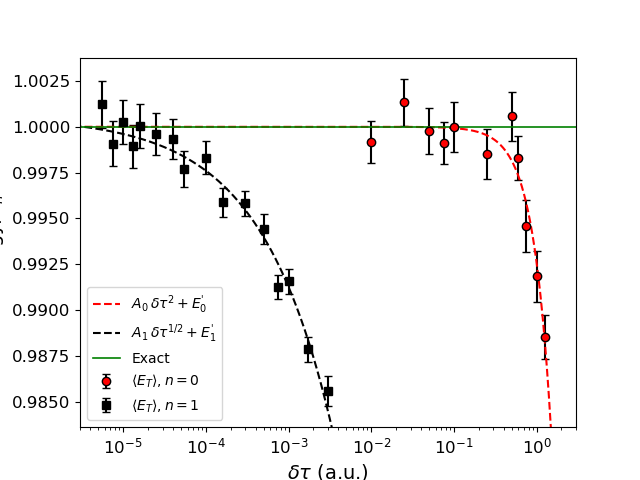

In [5]:
plt.clf()
# Create the figure and axes
fig, ax = plt.subplots()

# Plot
ax.errorbar(dt0, energy0, errorbar0, label=r'$\left< E_{T} \right>, n=0$', fmt='ro', mec='k', ecolor='k', capsize=3)
ax.errorbar(dt1, energy1, errorbar1, label=r'$\left< E_{T} \right>, n=1$', fmt='ks', mec='k', ecolor='k', capsize=3)
ax.set_xlim(3*10**(-6),3)
ax.set_ylim(bottom=0.9836)
plt.plot(np.logspace(-6, np.log10(2),500), func0(np.logspace(-6, np.log10(2),500),a,b)/0.5, '--', color='r', label=r"$A_0\, \delta\tau^{2}+E_0^'$")
plt.plot(np.logspace(-6, np.log10(2),500), func1(np.logspace(-6, np.log10(2),500),c,d)/1.5, '--', color='k', label=r"$A_1\, \delta\tau^{1/2}+E_1^'$")
#ax.errorbar(pop, energy, errorbar, fmt='--', c='gray')
#ax.set_ylim(0.499, 0.508)
ax.axhline(y=E, color='green', linestyle='-', linewidth=1.2, label='Exact')
ax.set_xscale('log')

# Add labels and legends
ax.set_xlabel(r'$\delta \tau$ (a.u.)', fontsize=14)
ax.set_ylabel('Energy/$E_n$', fontsize=14)
ax.legend(loc='lower left')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Show figure
plt.show()

In [6]:
plt.savefig('Gs+Es Time error plot.png', dpi=300, bbox_inches='tight')